# Experiment Objective

COMP 4432
This project is done by Golam Imran and Indresh Muniraj.

The image dataset is taken from kaggle website (https://www.kaggle.com). The terms and conditions can be found in the following link, https://www.kaggle.com/terms for in-depth details regarding the site. Kaggle is site which host machine learning competitions/data science contests. The datasets present here is open-source and is community-maintained. 

The dataset taken is Plant Village, which contain images of the healthy and unhealthy leaves of different categories by species and disease. We are mainly focusing on the potato leaves which contains 2000 images of unhealthy leaves and 152 images of healthy leaves. The unhealthy leaves is divided into 2 categories namely, early blight and late blight of 1000 images each. The dataset was downloaded manually from the kaggle website and removed the images of different species, since we were focusing on the potato images only.

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

Drive not mounted, so nothing to flush and unmount.
All changes made in this colab session should now be visible in Drive.


In [ ]:
# Add additional Python packages that we will be using in class
!apt install graphviz build-essential checkinstall imagemagick
# Base Python packages to run example Jupyter Notebooks
!pip install watermark pyprind mlxtend
# Python packages to visualize Decision Tree Classifiers
!pip install pydotplus graphviz pyparsing
# Python packages for Natrual Language Processing
!pip install nltk
# Python packages for Flask-based web applications
!pip install flask wtforms
# Python packages for TensorFlow
!pip install tensorflow tensorflow-datasets

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  file fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagic-mgc libmagic1 libmagickcore-6.q16-3
  libmagickcore-6.q16-3-extra libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7
  netpbm poppler-data
Suggested packages:
  gettext fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr
  | lprng enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray
  radiance sane-utils texlive-base-bin transfig ufraw-batc

In [ ]:
machine_learning_root='Machine Learning'
current_chapter_root=machine_learning_root + '/Project 3'

In [ ]:
google_drive_mount_location = '/content/drive'
machine_learning_prefix=google_drive_mount_location + '/My Drive/' + machine_learning_root + '/'
current_chapter_prefix=google_drive_mount_location + '/My Drive/' + current_chapter_root + '/'

In [ ]:
from google.colab import drive
drive.mount(google_drive_mount_location)

Mounted at /content/drive


In [ ]:
import os
os.chdir(current_chapter_prefix)

# Data Collection and Preprocessing

In [ ]:
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
imgdir_path = pathlib.Path('Potato')

Storing the location of the potato dataset image so that we can extract the images from the local disk.

In [ ]:
image_size = 256
batch = 32

Initializing a few constant variable. The image_size variable is for reshaping the image size of the image dataset. The batch variable is for creating the batches so that the dataset is grouped in batches.

In [ ]:
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    imgdir_path,
    seed=50,
    shuffle=True,
    image_size=(image_size,image_size),
    batch_size=batch
)

Found 2152 files belonging to 3 classes.


Using the tensonflow function, tf.keras.preprocessing.image_dataset_from_directory(), we are extracting the image dataset from the pre-set directory location. We are also shuffling the dataset, resize the images and grouping them by batches.

In [ ]:
image_labels = image_dataset.class_names
image_labels

['Early_blight', 'Late_blight', 'healthy']

Getting the image label information. The labels are early blight, late blight and healthy leaves images that have 1000, 1000 and 152 images respectively.

In [ ]:
for i, j in image_dataset.take(5):
    print(i.shape)
    print(j.numpy())

(32, 256, 256, 3)
[1 0 0 0 1 0 2 0 1 1 0 1 1 1 1 1 1 1 1 0 0 2 1 1 2 0 1 0 2 1 0 1]
(32, 256, 256, 3)
[0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 2 0 0 1 1 2 1 1 1 0 1]
(32, 256, 256, 3)
[1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0]
(32, 256, 256, 3)
[1 1 0 0 0 0 0 1 1 0 0 1 1 0 2 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1]
(32, 256, 256, 3)
[1 0 2 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 2 1 1 0 1 1 0 1 1 1 0]


The above code is used to retrieve the image and label information of the image dataset. (32, 256, 256, 3) are the batch size, image resolution (256*256) and number of channels. The list is the labels of the images, 0 is for early blight, 1 is for the late blight and 2 is the healthy images.

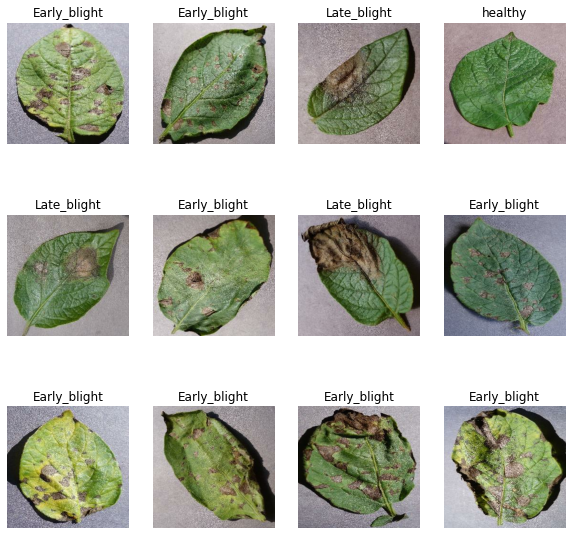

In [ ]:
plt.figure(figsize=(10, 10))
for i, j in image_dataset.take(1):
    for k in range(12):
        ax = plt.subplot(3, 4, k + 1)
        plt.imshow(i[k].numpy().astype("uint8"))
        plt.title(image_labels[j[k]])
        plt.axis("off")

The above code is used shows few images from the dataset.

In [ ]:
def dataset_partitions(data, train_split=0.8, validation_split=0.2, shuffle=True, shuffle_size=100000):
    assert (train_split + validation_split) == 1
    
    data_size = len(data)
    
    if shuffle:
        data = data.shuffle(shuffle_size, seed=12)
    
    training_size = int(train_split * data_size)
    validation_size = int(validation_split * data_size)
    
    train_dataset = data.take(training_size)    
    validation_dataset = data.skip(training_size).take(validation_size)
    
    return train_dataset, validation_dataset

In [ ]:
train_dataset, validation_dataset = dataset_partitions(image_dataset)

The dataset_partition function is used to divide the dataset into training dataset and validation dataset. The training dataset is 80% of the whole dataset and validation dataset is 20% of the whole dataset. 

In [ ]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

The above code is used to store the training dataset and validation dataet in the memory and used further to improve the execution preformance. The training and validation dataset is shuffled again here and the buffer size for the memory is kept AUTOTUNE, where the the size if assigned automatically based on the memory available.

# TensorFlow Model Creation

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Resizing(image_size, image_size),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
])

The above code is used for resize and rescaling the images. Since in the image numpy array is between 0 to 255, which is the RGB scale. We divide the numpy array by 255 to get a number between 0 to 1. This is done by using the tf.keras.Sequential() function.

In [ ]:
data_aug = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

The above code is used for data argumentation to make the dataset more robust. Data augmentation in data analysis are techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data. It acts as a regularizer and helps reduce overfitting when training a machine learning model.

In [ ]:
train_dataset = train_dataset.map(
    lambda x, y: (data_aug(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
model = tf.keras.Sequential([
    resize_and_rescale,
    tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(batch, image_size, image_size, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

model.build(input_shape=(batch, image_size, image_size, 3))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

The tf.keras.layers.Conv2D is layer which creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. The benefit of using this layer is to be able to perform similar operations at the same time. The Conv2D is followed by tf.keras.layers.MaxPooling2D layer, which operates for 2D spatial data.This layer will downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window for each channel of the input. We are stacking a few layers of Conv2D and MaxPooling2D layers. Then we are using tf.keras.layers.Flatten layer, which is used to flatten the input. It does not the affect the batch size. The Flatten layer is followed by two layers of Dense layer. The dense layer, the output generated by the dense layer is an 'm' dimensional vector. Thus, dense layer is basically used for changing the dimensions of the vector. The dense layer is also the hidden layer. The numerical value taken is based on trail and error method. The activation variable as relu parameter which is commonly used.

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

The above code is used to compile the model we created. The optimizer used is adam, which is commonly used. The loss is tf.keras.losses.SparseCategoricalCrossentropy, which is used to compute the crossentropy loss between the labels and predictions. The loss is followed by metric, which is used to judge the performance of your model.

# TensorFlow Estimator Creation and Training

In [ ]:
estimator = tf.keras.estimator.model_to_estimator(
    keras_model=model,
    model_dir='models/estimator/')

The above code is used to create an estimator based on the keras model that was created.

In [ ]:
training_model = model.fit(
    train_dataset,
    batch_size=32,
    validation_data=validation_dataset,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 15s 275ms/step - loss: 0.0675 - accuracy: 0.9734 - val_loss: 0.0628 - val_accuracy: 0.9784
Epoch 2/50
54/54 [==============================] - 15s 273ms/step - loss: 0.0212 - accuracy: 0.9948 - val_loss: 0.0859 - val_accuracy: 0.9688
Epoch 3/50
54/54 [==============================] - 15s 276ms/step - loss: 0.0305 - accuracy: 0.9873 - val_loss: 0.0430 - val_accuracy: 0.9880
Epoch 4/50
54/54 [==============================] - 15s 271ms/step - loss: 0.0126 - accuracy: 0.9948 - val_loss: 0.1577 - val_accuracy: 0.9519
Epoch 5/50
54/54 [==============================] - 15s 271ms/step - loss: 0.0223 - accuracy: 0.9925 - val_loss: 0.0777 - val_accuracy: 0.9832
Epoch 6/50
54/54 [==============================] - 15s 273ms/step - loss: 0.0558 - accuracy: 0.9826 - val_loss: 0.2343 - val_accuracy: 0.9255
Epoch 7/50
54/54 [==============================] - 15s 271ms/step - loss: 0.0324 - accuracy: 0.9913 - val_loss: 0.1074 - val_accuracy: 0.9615

Using the keras model, we are training the dataset with epoch being 100.

In [ ]:
scores_val = model.evaluate(validation_dataset)

13/13 [==============================] - 0s 33ms/step - loss: 0.0353 - accuracy: 0.9904


Checking the model against the validation dataset to find the accuracy and the loss. We got the model accuracy of 99% and loss of 5%.

In [ ]:
scores_val

[0.035254351794719696, 0.9903846383094788]

# TensorFlow Estimator Performance Evaluation and Visualization

In [ ]:
accuracy = training_model.history['accuracy']
validation_accuracy = training_model.history['val_accuracy']

loss = training_model.history['loss']
validation_loss = training_model.history['val_loss']

Retriving the scores of accuracy, validation accuracy, loss and validation loss for the training model which was performed earlier. 

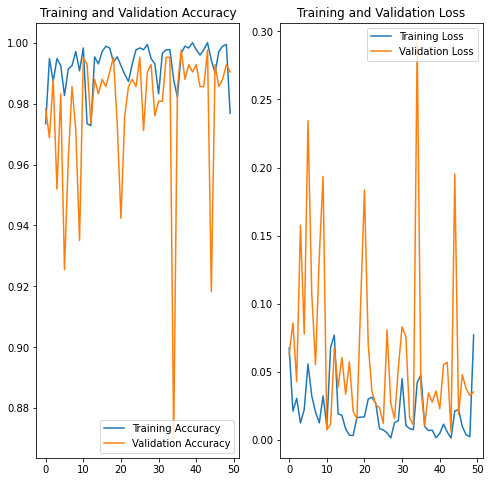

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(50), accuracy, label='Training Accuracy')
plt.plot(range(50), validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Ploting the training and validation accuracy and loss. From the graph we can see that training and validation accuracy keeps on changing during the model training and at end of the training accuracy score is around 99%. The training and validation loss score also keeps on changing throughout the model training and at the end the score was around 7%.

From the model training, we can see that training and validation accuracy is nearly 99% and training and validation loss is around 7%. Since the training on the dataset is 50 times, the accuracy and loss score vary during the training model. The trained model is used against the validation dataset to check the model accuracy, and the accuracy we are getting is around 99% and loss is around 5%. 